In [170]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
top = 100
X = data.data[:, :2]
y = data.target


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
m = confusion_matrix(y_true, y_pred)
new_m = []
l = []
print(m)
for i in m:
    s = sum(i)
    for ii in i:
        l.append(round(ii / s * 100))
    new_m.append(l)
    l = []
print(np.array(new_m))

print(f1_score(y_true, y_pred, average='macro'))
print(accuracy_score(y_true, y_pred))

In [378]:
import numpy as np

class DecisionStump():
    """
    Weak classifier.
    Is equal to sklearn.tree.DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
    """
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.threshold_w = None
        self.alpha = None
        self.missclassified = None
        
    def fit(self, X, y, sample_weight=None):
        """
        find best split (threshold) in descicion tree node
        """
        if sample_weight is not None:
            sample_weight = [1] * X.shape[0]
        
        thresholds = np.unique(X)
        missclassified_ = []
        for n, x_j in enumerate(thresholds):
            self.threshold = x_j
            self.threshold_w = x_j*sample_weight[n]
            weak_learner_preds = self.predict(X, sample_weight)
            missclassified_.append(self.missclassification(y, weak_learner_preds))
        self.threshold = thresholds[np.argmin(missclassified_)]
        self.threshold_w = thresholds[np.argmin(missclassified_)]*sample_weight[np.argmin(missclassified_)]
        self.missclassified = self.missclassification(y, self.predict(X, sample_weight))
        
    def missclassification(self, y, y_hat):
        return sum(y != y_hat)
    
    def predict(self, X, wieghts):
        preds = np.zeros(X.shape[0])
        preds[X*wieghts < self.threshold_w] = 1
        return preds


class AdaBoost():
    def __init__(self):
        self.weights = np.expand_dims(np.ones(1), axis=0) # empty weights, redundant
        self.estimators = 2
        self.weak_learners = []
    
    def accuracy(self, loss):
        """
        explain
        """
        return np.log((1 - loss) / loss) / 2
        
    def fit(self, X, y):
        self.weights = np.ones(X.shape) / X.shape[0]
        for i in range(self.estimators):
            temp_clfs = []
            for feature in range(X.shape[1]):
                clf = DecisionStump()
                clf.fit(X[:,feature], y, sample_weight=self.weights[:,feature])
                temp_clfs.append(clf)

            best_weak_learner_index = np.argmin([i.missclassified for i in temp_clfs])  # choose best weak learner
            self.weak_learners.append(temp_clfs[best_weak_learner_index])               # save it
            acc = self.accuracy(self.weak_learners[-1].missclassified / X.shape[0])     # count its accuracy
            self.weak_learners[-1].alpha = acc                                          # save it inside weak learner
            self.weak_learners[-1].feature_index = best_weak_learner_index              # save feature index by which we split
            y_hat = self.weak_learners[-1].predict(X[:,best_weak_learner_index], self.weights[:,best_weak_learner_index])
            
            self.weights[:,best_weak_learner_index] = (self.weights[:,best_weak_learner_index] * np.exp(-acc * y * y_hat)) / self.weights[:,best_weak_learner_index].sum()

    def predict(self, X):
        preds = []
        for weak_learner in self.weak_learners:
            preds.append(weak_learner.predict(X[:,weak_learner.feature_index], self.weights))  #  * weak_learner.alpha
            
        return np.sign()
                
    
clf = AdaBoost()
clf.fit(X, y)
clf.predict(X[:3,:])


ValueError: operands could not be broadcast together with shapes (3,) (569,2) 

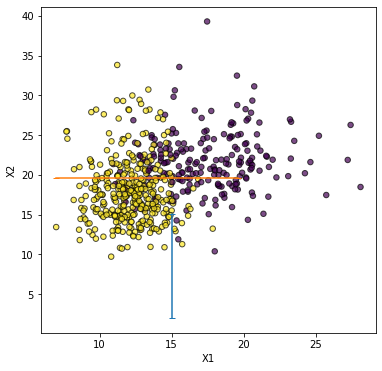

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# x1 = (np.ones(X.shape) / X.shape[0] * X)[:,0]
# x2 = (np.ones(X.shape) / X.shape[0] * X)[:,1]
x1 = X[:,0]
x2 = X[:,1]
z = y

fig = plt.figure(figsize=(6, 6))
plt.scatter(x1, x2,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 30,
           c=z)

line1 = 15.05 # / X.shape[0]
line2 = 19.62 # / X.shape[0]
plt.plot([line1, line1], [2, line1], marker = '_') # /X.shape[0]
plt.plot([line2, 7], [line2, line2], marker = '_') # /X.shape[0] 
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()